Primeiro vamos importar as bibliotecas necessárias para a análise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Temos um conjunto de dados pequeno com o total de gasto com a assinatura de um certo serviço online.
Vamos analisá-lo para verificar: 
<ul>
<li>as 3 ocupações mais comum</li>
<li>o total de receita por ano com as assinaturas</li>
<li>plotar um gráfico com a ocupação e sexo</li>
</ul>


Primeiro vamos importar o conjunto de dados, salvar na variável assinaturas e mostrar os 5 primeiros registros

In [2]:
assinaturas = pd.read_csv("assinaturas.csv", sep=';')
assinaturas.head()

,Username,Nome,Sexo,Data_Nascimento,Ocupação,Assinatura,Total_Gasto
0,Neave1959,Mrs Anna \t Sharp,feminino,02/02/1970,Engenheiro de Dados,18/09/2020,140.04
1,Nicterims1993,Mrs \tDaisy Anderson,masculino,05/07/1985,Engenheiro de Dados,29/01/2021,2417.81
2,Fouldlairity,Ms Zoe \tPeacock,masculino,03/06/1964,Analista Financeiro,04/12/2020,51.95
3,Ancomettiody,Mrs Libby \tWilliams,feminino,04/09/1974,Estatístico,21/11/2020,130.73
4,Onswis,Ms Katie \tMetcalfe,feminino,01/07/1983,Engenheiro de Machine Learning,27/02/2021,1778.72


Verificando os tipos dos atributos

In [3]:
assinaturas.dtypes

Username            object
Nome                object
Sexo                object
Data_Nascimento     object
Ocupação            object
Assinatura          object
Total_Gasto        float64
dtype: object

Verificar se existem dados ausentes - se houver, imprime True, caso contrário, False

In [4]:
assinaturas.isnull().any()

Username           False
Nome               False
Sexo               False
Data_Nascimento    False
Ocupação           False
Assinatura         False
Total_Gasto        False
dtype: bool

Vamos agora alterar "Assinatura" de objeto para string e "Total_Gasto" para float

In [5]:
assinaturas['Assinatura'] = assinaturas['Assinatura'].convert_dtypes()
assinaturas['Total_Gasto '] = assinaturas['Total_Gasto '].convert_dtypes(float)

Verificando novamente os tipos de dados

In [6]:
assinaturas.dtypes

Username            object
Nome                object
Sexo                object
Data_Nascimento     object
Ocupação            object
Assinatura          string
Total_Gasto        Float64
dtype: object

Foi verificado que no atributo 'Total_Gasto', tem um espaço antes do últmo '. Sendo assim vamos renomear o atributo

In [7]:
assinaturas.rename(columns={'Total_Gasto ': 'Total_Gasto'}, inplace=True)

separando o ano de data_status e atribuindo a uma variável

In [8]:
assinatura_separado = assinaturas.iloc[:, 5]
assinaturas['Ano'] = pd.DatetimeIndex(assinatura_separado).year

Mostrando os primeiros registros e verificando se foi criado o atributo 'Ano'

In [9]:
assinaturas.head()

,Username,Nome,Sexo,Data_Nascimento,Ocupação,Assinatura,Total_Gasto,Ano
0,Neave1959,Mrs Anna \t Sharp,feminino,02/02/1970,Engenheiro de Dados,18/09/2020,140.04,2020
1,Nicterims1993,Mrs \tDaisy Anderson,masculino,05/07/1985,Engenheiro de Dados,29/01/2021,2417.81,2021
2,Fouldlairity,Ms Zoe \tPeacock,masculino,03/06/1964,Analista Financeiro,04/12/2020,51.95,2020
3,Ancomettiody,Mrs Libby \tWilliams,feminino,04/09/1974,Estatístico,21/11/2020,130.73,2020
4,Onswis,Ms Katie \tMetcalfe,feminino,01/07/1983,Engenheiro de Machine Learning,27/02/2021,1778.72,2021


Criando um novo conjunto de dados somente com os que vamos utilizar

In [22]:
dataset = assinaturas[['Ocupação', 'Total_Gasto', 'Ano']]
dataset

,Ocupação,Total_Gasto,Ano
0,Engenheiro de Dados,140.04,2020
1,Engenheiro de Dados,2417.81,2021
2,Analista Financeiro,51.95,2020
3,Estatístico,130.73,2020
4,Engenheiro de Machine Learning,1778.72,2021
5,Gerente de Tecnologia,1034.74,2022
6,Analista de Inteligência de Mercado,1320.04,2022
7,Web Designer,3464.72,2022
8,Analista de Inteligência de Mercado,1257.45,2021
9,Arquiteto de Dados,771.99,2020


### Analisando os Dados

1. Relacionando as 3 ocupações mais comuns dos assinantes

In [88]:
top3_ocupacoes = dataset['Ocupação'].value_counts().sort_values(ascending=False).head(3)
top3_ocupacoes

Cientista de Dados     8
Engenheiro de Dados    6
Arquiteto de Dados     3
Name: Ocupação, dtype: int64

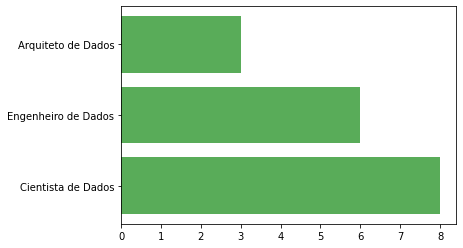

In [116]:
x = ['Cientista de Dados', 'Engenheiro de Dados', 'Arquiteto de Dados']
y = [8, 6, 3]
plt.barh(x, y, color='g', alpha=0.65)
plt.show()

2. Agora vamos criar o gráfico com o total de receita gerada com as assinaturas do serviço, de acordo com a ocupação e por ano

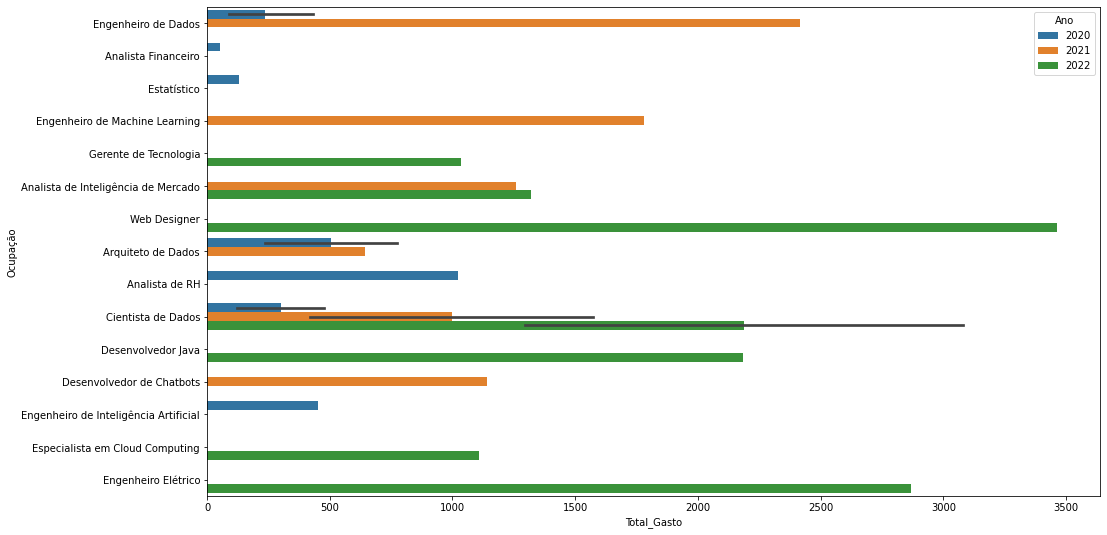

In [41]:
totalGasto = dataset['Total_Gasto']
figure = plt.subplots(figsize=(16, 9))
sns.barplot(x='Total_Gasto', y='Ocupação', hue='Ano', data = dataset)
plt.show()

3. Total de receita gerada por ano

Primeiro vamos agrupar o total de gasto por ano

In [49]:
grupo = dataset.groupby(by='Ano').sum()
grupo

,Total_Gasto
Ano,
2020,5040.06
2021,9233.26
2022,16352.77


vamos agora selecionar os anos

In [72]:
anos = dataset.iloc[:, -1].unique()
anos

array([2020, 2021, 2022], dtype=int64)

Por úlimo criamos o plot com o total de receita por ano

<AxesSubplot:ylabel='Total_Gasto'>

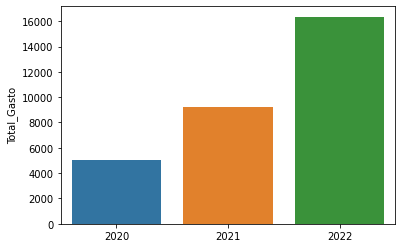

In [73]:
sns.barplot(x=anos, y = 'Total_Gasto', data=grupo)

4. Gráfico de acordo com a ocupação e sexo

<AxesSubplot:xlabel='Ocupação', ylabel='count'>

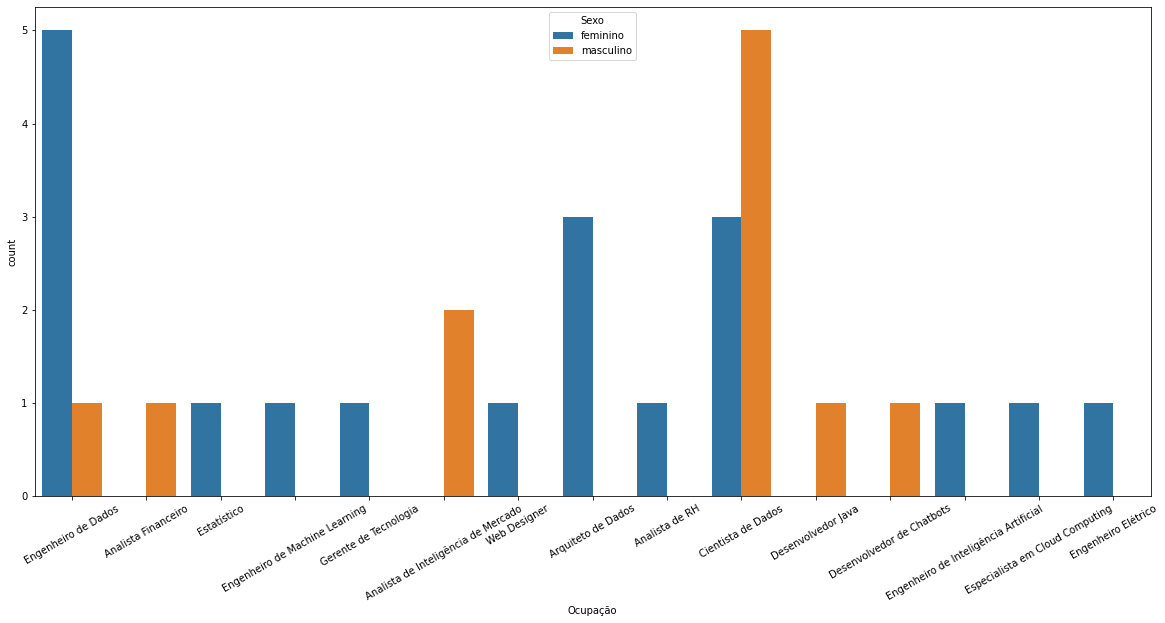

In [87]:
plt.close()
figure, ax = plt.subplots(figsize=(20, 9))
ax.tick_params(axis='x', rotation = 30)
sns.countplot(x = 'Ocupação', hue = 'Sexo', data=assinaturas)